# Test echelle on MS star

In [1]:
import lightkurve as lk
import warnings
warnings.filterwarnings('ignore')

In [2]:
datalist = lk.search_lightcurvefile('16CygA',cadence='short')
data = datalist[3:4].download_all()
lc = data[0].PDCSAP_FLUX.normalize().flatten()
for nlc in data:
    lc = lc.append(nlc.PDCSAP_FLUX.normalize().flatten())
lc = lc.remove_nans()
pg = lc.to_periodogram(normalization='psd')
snr = pg.flatten()

Our value for numax is: 2190.08 uHz
Our value for dnu is: 103.41 uHz


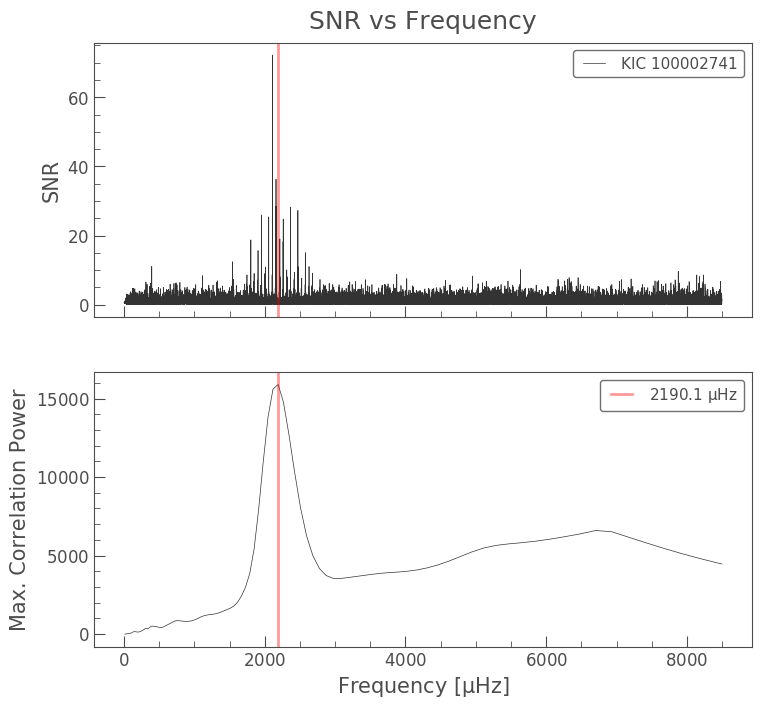

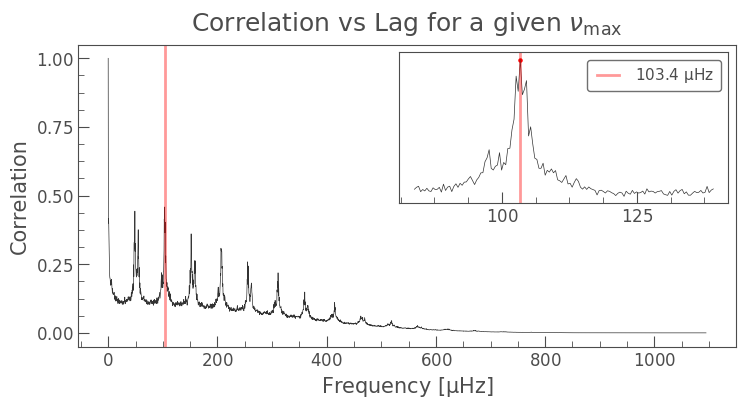

In [3]:
numax, ax = snr.estimate_numax(show_plots=True)
print('Our value for numax is: {:.2f}'.format(numax))
dnu, ax = snr.estimate_dnu(show_plots=True)
print('Our value for dnu is: {:.2f}'.format(dnu))

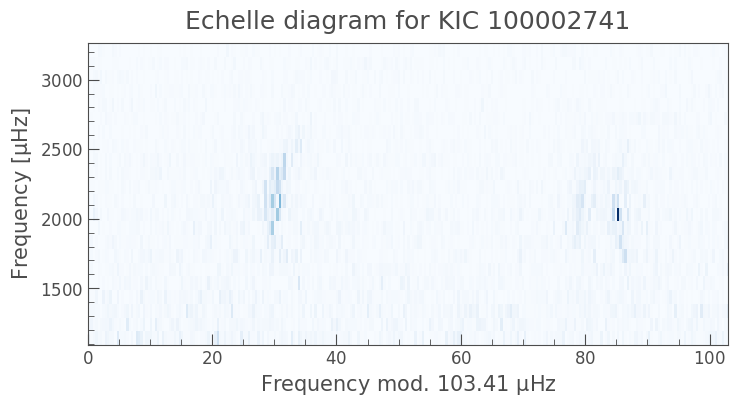

In [22]:
pg.plot_echelle(dnu, numax, interpolation=True)

## My way (adapted from Dan Hey)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [29]:
f = snr.frequency.value
p = snr.power.value
d = dnu.value
nmx = numax.value
fwhm = 0.25*numax.value
fs = np.median(np.diff(f))

In [7]:
fmin = nmx - 2*fwhm   #The lower frequency bound
fmax = nmx + 2*fwhm   #The upper frequency bound

fmax += d #Add one 1x Dnu so we don't miss off any important range due to rounding cutt offs

fs = np.median(np.diff(f)) #The frequency spacing

ff = f[int(fmin/fs):int(fmax/fs)] #The the selected frequency range
pp = p[int(fmin/fs):int(fmax/fs)] #The selected power range

n_rows = int((ff[-1]-ff[0])/d)         #The number of stacks to use
n_columns = int(d/fs)  #The number of elements in each stack

In [8]:
ep = np.reshape(pp[:(n_rows*n_columns)],(n_rows,n_columns)) #Reshape the power into n_stacks of n_elements
ef = np.reshape(ff[:(n_rows*n_columns)],(n_rows,n_columns)) #Reshape the freq into n_stacks of n_elements

In [9]:
x_f = ((ef[0,:]-ef[0,0]) % d)
y_f = (ef[:,0])
X, Y = np.meshgrid(x_f, y_f)

In [10]:
y_f

array([1095.23926835, 1198.6144835 , 1301.98969866, 1405.36491381,
       1508.74012896, 1612.11534411, 1715.49055927, 1818.86577442,
       1922.24098957, 2025.61620473, 2128.99141988, 2232.36663503,
       2335.74185018, 2439.11706534, 2542.49228049, 2645.86749564,
       2749.2427108 , 2852.61792595, 2955.9931411 , 3059.36835626,
       3162.74357141, 3266.11878656])

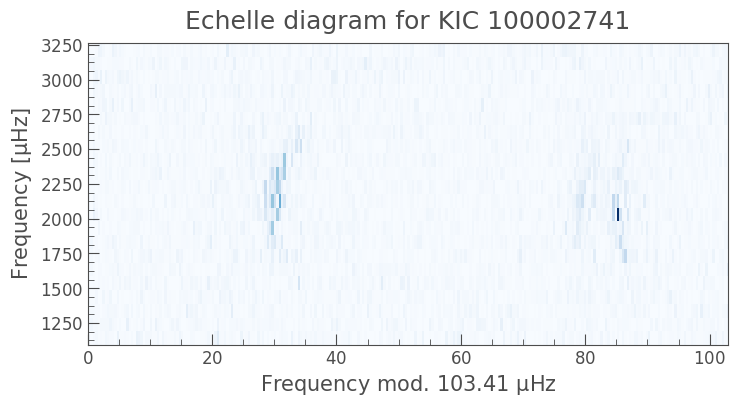

In [24]:
with plt.style.context(lk.MPLSTYLE):
    fig, ax = plt.subplots()

    extent = (x_f[0],x_f[-1],y_f[0],y_f[-1])
    figsize = plt.rcParams['figure.figsize']
    a = figsize[1]/figsize[0]
    b = (extent[3]-extent[2])/extent[1]
    
    
    i = ax.imshow(ep,cmap='Blues', aspect=a/b, origin='lower',
             extent=extent)
    
    ax.set_xlabel(r'Frequency mod. {:.2f} {}'.format(dnu.value, dnu.unit.to_string('latex')))
    ax.set_ylabel(r'Frequency [{}]'.format(dnu.unit.to_string('latex')))
    ax.set_title('Echelle diagram for {}'.format(pg.label))
    
    plt.show()    

In [25]:
a = None
if a > 50:
    print('hi')

TypeError: '>' not supported between instances of 'NoneType' and 'int'